**Random Forest Algorithm**

In [1]:
##Groups mulitple of decision tree together to form a classification
##Decision of maximum no of tree is taken ie MEAN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("car_evaluation.csv")

In [4]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [7]:
df[df.duplicated()]

,vhigh,vhigh.1,2,2.1,small,low,unacc


In [8]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
col_names = ["buying","maint","doors","persons","lug_boot","saftey","class"]

In [10]:
df.columns = col_names

In [11]:
df

,buying,maint,doors,persons,lug_boot,saftey,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   saftey    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
##no NUll values

In [14]:
df.describe(include = "all").T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
saftey,1727,3,med,576
class,1727,4,unacc,1209


In [15]:
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
saftey
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
oe = OrdinalEncoder()

In [18]:
df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['saftey'] = oe.fit_transform(df[['saftey']])
df['class'] = oe.fit_transform(df[['class']])

In [19]:
df.head()

,buying,maint,doors,persons,lug_boot,saftey,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0


In [20]:
X = df.drop("class", axis= 1)
y = df['class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf1 = RandomForestClassifier()
clf= RandomForestClassifier()
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = clf1.predict(X_test)

In [26]:
y_pred

array([2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 0.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 2., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       0., 2., 3., 0., 2., 2., 2., 0., 2., 2., 2., 2., 3., 2., 2., 0., 2.,
       0., 2., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 1., 2., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 0., 2., 0., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 3., 2., 3., 0., 0., 2., 3.,
       0., 2., 3., 2., 0., 0., 3., 2., 0., 2., 0., 2., 2., 0., 1., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3.,
       2., 0., 2., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       2., 2., 0., 3., 0.

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print("Accuracy = ", accuracy_score(y_pred, y_test))

Accuracy =  0.9595375722543352


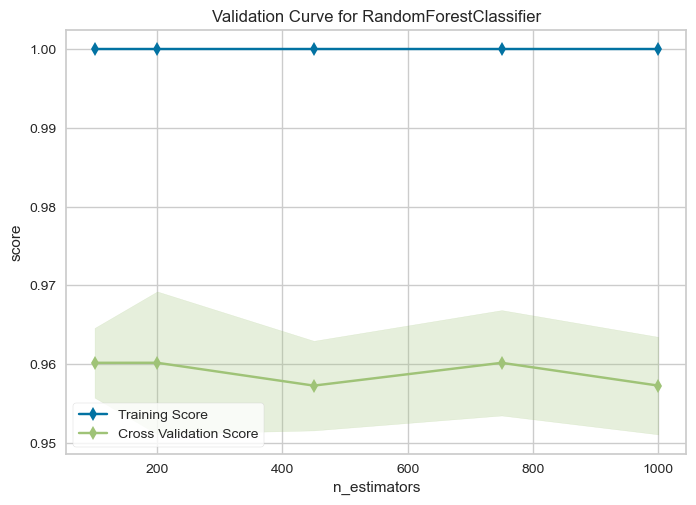

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>

In [31]:
from yellowbrick.model_selection import validation_curve
num_est = [100,200,450,750,1000]
viz = validation_curve(
    RandomForestClassifier(),X = X_train, y = y_train, param_name='n_estimators',
    param_range=num_est, cv=3, scoring='accuracy'
)

# Fit the visualizer to the training data and visualize the curve
viz.fit(X_train, y_train)
viz.show()

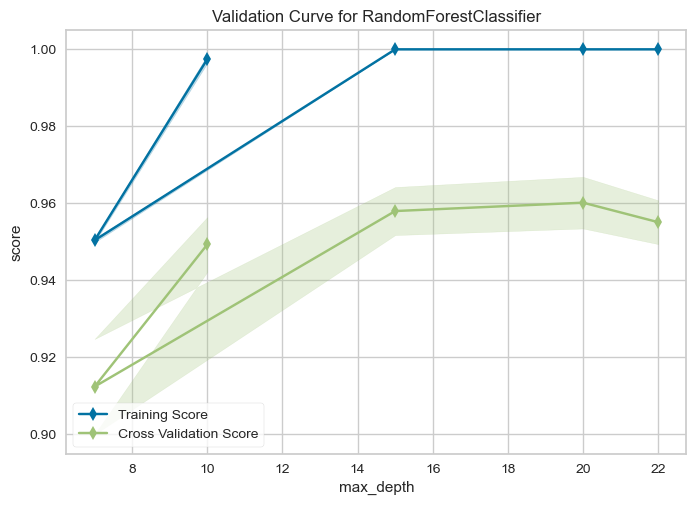

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [33]:
depth_vals = [10,7,15,20,22]
viz = validation_curve(
    RandomForestClassifier(),X = X_train, y = y_train, param_name='max_depth',
    param_range=depth_vals, cv=3, scoring='accuracy'
)

# Fit the visualizer to the training data and visualize the curve
viz.fit(X_train, y_train)
viz.show()

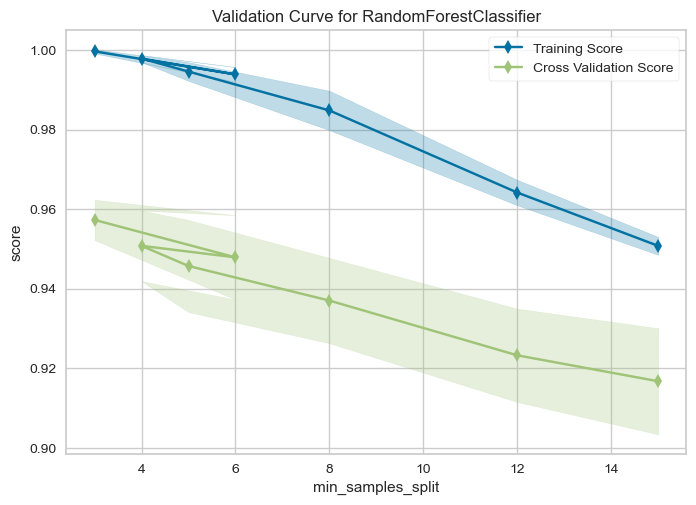

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>

In [34]:
min_samples = [3,6,4,5,8,12,15]
viz = validation_curve(
    RandomForestClassifier(),X = X_train, y = y_train, param_name='min_samples_split',
    param_range=min_samples, cv=3, scoring='accuracy'
)

# Fit the visualizer to the training data and visualize the curve
viz.fit(X_train, y_train)
viz.show()

In [38]:
clf2 = RandomForestClassifier(n_estimators = 750, min_samples_split =3,max_depth = 20, random_state = 0)

In [39]:
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=750,
                       random_state=0)

In [40]:
pred2 = clf2.predict(X_test)

In [41]:
print("Accuracy= ", accuracy_score(pred2, y_test))

Accuracy=  0.9710982658959537


In [43]:
features_score = pd.Series(clf2.feature_importances_,index = X_train.columns).sort_values(ascending = False)
print(features_score)

saftey      0.287613
persons     0.234552
buying      0.185005
maint       0.148091
lug_boot    0.082444
doors       0.062295
dtype: float64


Text(0.5, 0, 'Feature Importance Score')

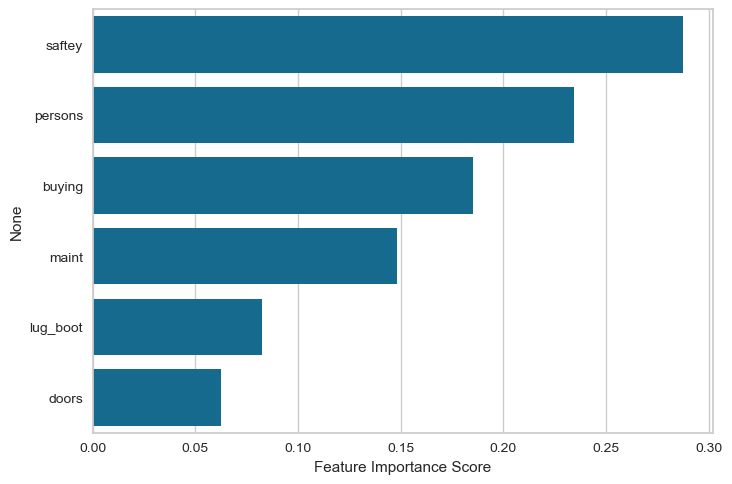

In [44]:
sns.barplot(x= features_score, y = features_score.index)
plt.xlabel("Feature Importance Score")

In [45]:
clf3 = RandomForestClassifier()

In [46]:
Xn = df.drop(["doors","lug_boot","maint"],axis = 1)
yn = df["class"]

In [47]:
X_trainn, X_testn, y_trainn, y_testn = train_test_split(Xn,yn, test_size =0.3 , random_state = 42)

In [48]:
clf3.fit(X_trainn, y_trainn)

RandomForestClassifier()

In [49]:
pred3 = clf3.predict(X_testn)

In [50]:
print("Accuracy =", accuracy_score(y_testn, pred3))

Accuracy = 1.0
